## Generalized Additive Models (GAMs)

A **Generalized Additive Model (GAM)** is a flexible regression technique that captures non-linear relationships between features and the target variable. Unlike linear regression, which assumes straight-line relationships, GAMs fit smooth curves to each feature individually and then add them together to make predictions. This approach maintains the interpretability of additive models while allowing for complex, non-linear patterns in the data. Each feature contributes **independently** to the final prediction - there are no interactions between features. The model learns a separate (nonlinear) curve for each feature, and the final prediction is simply the sum of all individual feature contributions plus a baseline.

In this example, we use Microsoft's **ExplainableBoostingRegressor** with `interactions=0`, which creates a pure additive model where each feature contributes independently to the final prediction through its own learned curve.

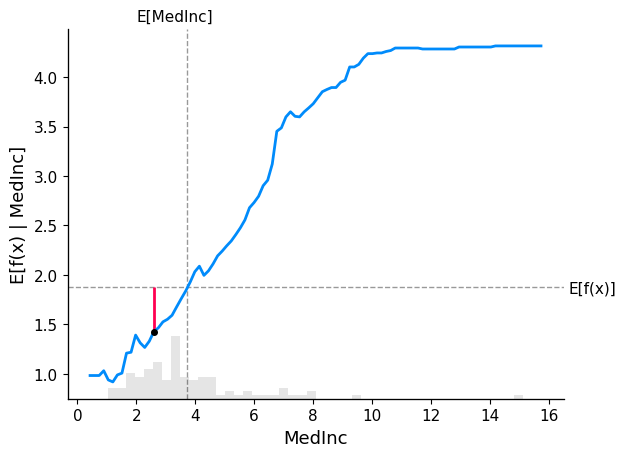

In [5]:
# fit a GAM model to the data
import interpret.glassbox
import sklearn
import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

sample_ind = 20  # index of the sample to highlight

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

## GAM Partial Dependence Plot: Non-Linear Relationships

This partial dependence plot reveals a key difference between GAMs and linear regression - the **nonlinear relationship** between median income and housing prices. Here is what we can interpret from the plot:

- **Curved blue line**: Unlike the straight line in linear regression, the GAM has learned a non-linear relationship
- **Diminishing returns pattern**: Higher incomes show less dramatic price increases (curve flattens at higher values)
- **Sample #20 overlay**: The red marker shows how this specific house's median income contributes to its prediction
- **SHAP consistency**: SHAP values work the same way - measuring deviation from the baseline, but now along a curved relationship

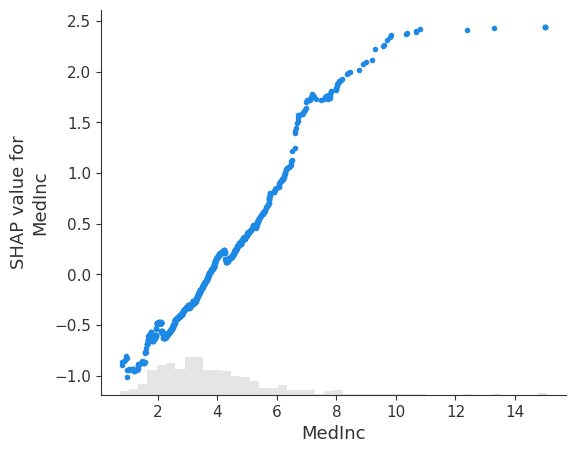

In [6]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

## GAM SHAP Scatter Plot: Non-Linear Feature Contributions

This scatter plot shows how the GAM's non-linear learning translates into SHAP value patterns across all 1,000 housing instances.
- **Curved relationship**: Unlike the linear model's straight scatter pattern, we see a curved relationship between median income values and their SHAP contributions
- **Non-constant slopes**: The rate of SHAP value change varies across different income levels, reflecting the GAM's learned curve
- **Diminishing returns**: Higher income values show smaller increases in SHAP contributions (flattening pattern)

This demonstrates how SHAP maintains consistent interpretation principles while adapting to more sophisticated model behaviors.

## GAM Waterfall Plot: Individual Prediction Breakdown

The waterfall plot provides a detailed breakdown of how the GAM model arrived at its prediction for sample #20, showing each feature's contribution. It's key elements are:
- **Baseline (E[f(X)])**: The expected model output across all instances (starting point)
- **Feature contributions**: Each bar shows how a feature pushes the prediction up (red) or down (blue) from baseline
- **Final prediction (f(x))**: The actual GAM prediction for this specific house

The waterfall format remains intuitive regardless of whether the underlying model uses linear or non-linear relationships.

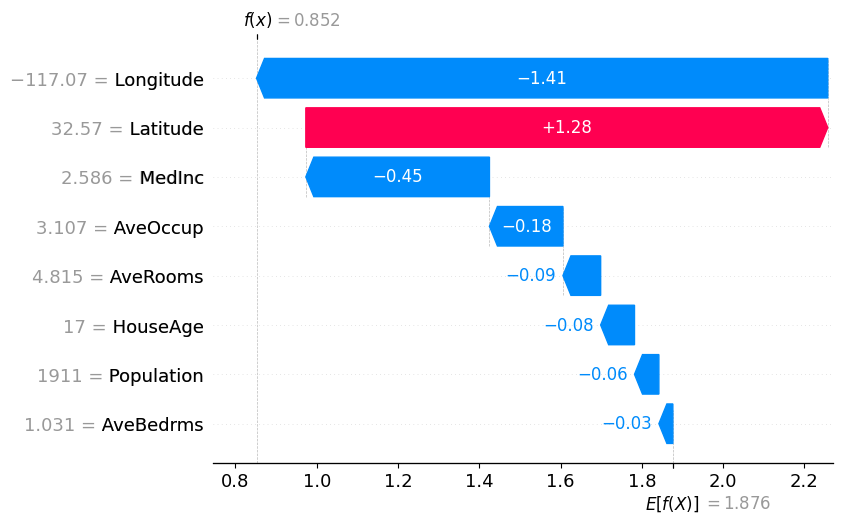

In [7]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind])

## GAM Beeswarm Plot: Global Feature Impact Summary

The **beeswarm plot** provides a comprehensive overview of how all features contribute to predictions across the entire dataset (all 1,000 housing instances). To interpret a beeswarm plot, it's important to pay attention to the following features.
- **Y-axis**: Lists all features, ordered by their overall importance to the model
- **X-axis**: SHAP values (feature contributions to individual predictions)
- **Each dot**: Represents one house's SHAP value for that feature (i.e. higher-density regions indicate more data points with a given SHAP value)
- **Colors**: Indicate the actual feature values (red = high, blue = low)

### Key Insights:
- **Feature importance ranking**: Features at the top have the largest impact on predictions overall
- **Value-impact relationships**: Color patterns reveal how feature values relate to their contributions
- **Distribution spread**: Wide spreads indicate features with varied impact across different instances
- **Directional patterns**: Clustering on positive/negative sides shows consistent feature effects

### GAM-Specific Observations:
- **Non-linear patterns**: Color gradients may show curved relationships (unlike linear models)
- **Feature independence**: Each row operates independently - no feature interactions
- **Enhanced accuracy**: The GAM's learned curves provide more nuanced feature contributions

This plot gives you the "big picture" view of how your GAM model uses all features to make housing price predictions.

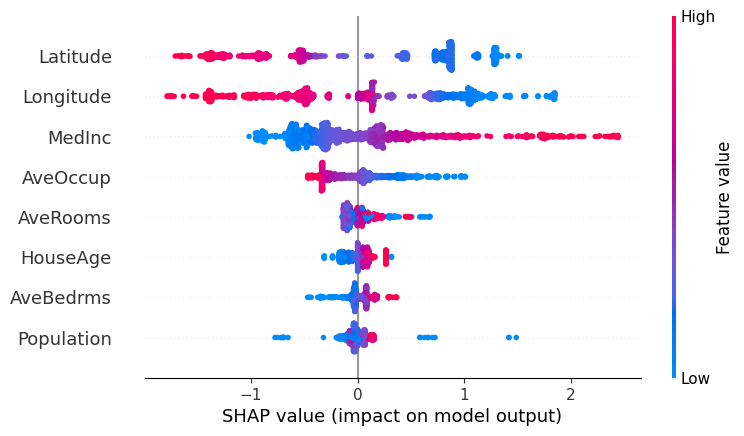

In [8]:
# the beeswarm plot displays SHAP values for each feature across all examples,
# with colors indicating how the SHAP values correlate with feature values
shap.plots.beeswarm(shap_values_ebm)